In [89]:
import xarray as xr

ds =  xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/SODA/soda_pop2.2.4')
ds

<xarray.Dataset>
Dimensions:  (lat: 330, lev: 40, lon: 720, time: 1680)
Coordinates:
  * time     (time) datetime64[ns] 1871-01-15 1871-02-15 ... 2010-12-15
  * lev      (lev) float64 5.01 15.07 25.28 ... 4.875e+03 5.125e+03 5.375e+03
  * lat      (lat) float64 -75.25 -74.75 -74.25 -73.75 ... 88.25 88.75 89.25
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Data variables:
    temp     (time, lev, lat, lon) float32 ...
    salt     (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    w        (time, lev, lat, lon) float32 ...
    taux     (time, lat, lon) float32 ...
    tauy     (time, lat, lon) float32 ...
    ssh      (time, lat, lon) float32 ...
Attributes:
    title:          SODA v2.2.4 monthly means
    Conventions:    ['COARDS', 'GrADS']
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/soda_2.2.4.php
    history:        Wed May 08 13:2

In [59]:
idx_time = -132
ds.time[idx_time]

<xarray.DataArray 'time' ()>
array('2000-01-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2000-01-15
Attributes:
    grads_dim:      t
    grads_mapping:  linear
    grads_size:     1680
    grads_min:      00z15jan1871
    grads_step:     1mo
    long_name:      time
    minimum:        00z15jan1871
    maximum:        00z15dec2010
    resolution:     30.43657

In [36]:
idx_lev = 30
ds.lev[idx_lev]

<xarray.DataArray 'lev' ()>
array(3125.)
Coordinates:
    lev      float64 3.125e+03
Attributes:
    units:          meters
    positive:       down
    name:           Depth
    grads_dim:      z
    grads_mapping:  levels
    long_name:      altitude
    minimum:        5.01
    maximum:        5375.0
    resolution:     137.69205

In [14]:
slice_lat = slice(10, 292)
ds.lat[slice_lat]

<xarray.DataArray 'lat' (lat: 282)>
array([-70.25, -69.75, -69.25, ...,  69.25,  69.75,  70.25])
Coordinates:
  * lat      (lat) float64 -70.25 -69.75 -69.25 -68.75 ... 69.25 69.75 70.25
Attributes:
    grads_dim:      y
    grads_mapping:  linear
    grads_size:     330
    units:          degrees_north
    long_name:      latitude
    minimum:        -75.25
    maximum:        89.25
    resolution:     0.5

In [4]:
idx_lon = int(-26.7 / ds.lon.attrs["resolution"])
ds.lon[idx_lon]

<xarray.DataArray 'lon' ()>
array(333.75)
Coordinates:
    lon      float64 333.8
Attributes:
    grads_dim:      x
    grads_mapping:  linear
    grads_size:     720
    units:          degrees_east
    long_name:      longitude
    minimum:        0.25
    maximum:        359.75
    resolution:     0.5

In [87]:
def mean(var):
    var_slice = var[-idx_time:,:,slice_lat,idx_lon]
    return var_slice.mean("time", skipna=True)

salt_mean = mean(ds.salt)

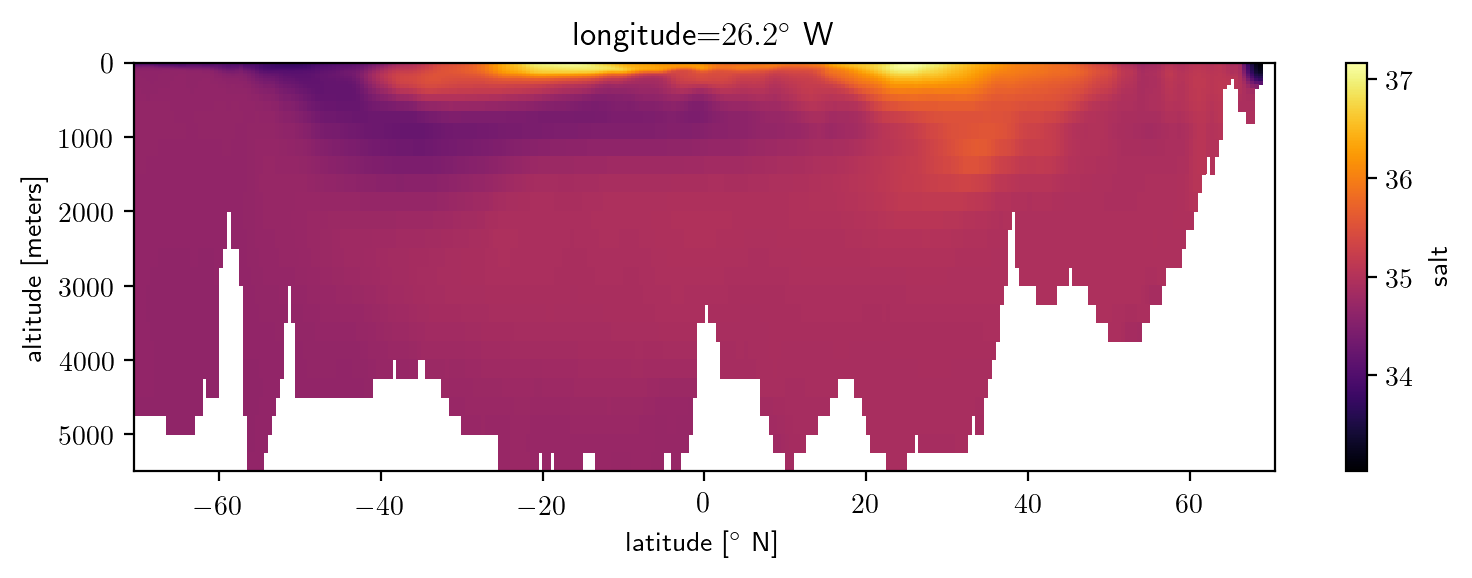

In [108]:
def plot(var, key, cmap="inferno", vmin=None, vmax=None):
    plt.rc("text", usetex=True)
    fig, ax = plt.subplots(figsize=(8,3))
    quad = var.plot(ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.invert_yaxis()
    ax.set_title(rf"longitude=${360-333.8:.1f}^{{\circ}}$ W")
    ax.set_xlabel("latitude [$^{\circ}$ N]")
    fig.tight_layout()
    fig.savefig(f"../ocean_mixing_{key}.pdf")
    return ax

plot(salt_mean, "salt")

In [90]:
temp_mean = mean(ds.temp)

/scratch/avmo/opt/phd-thesis/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


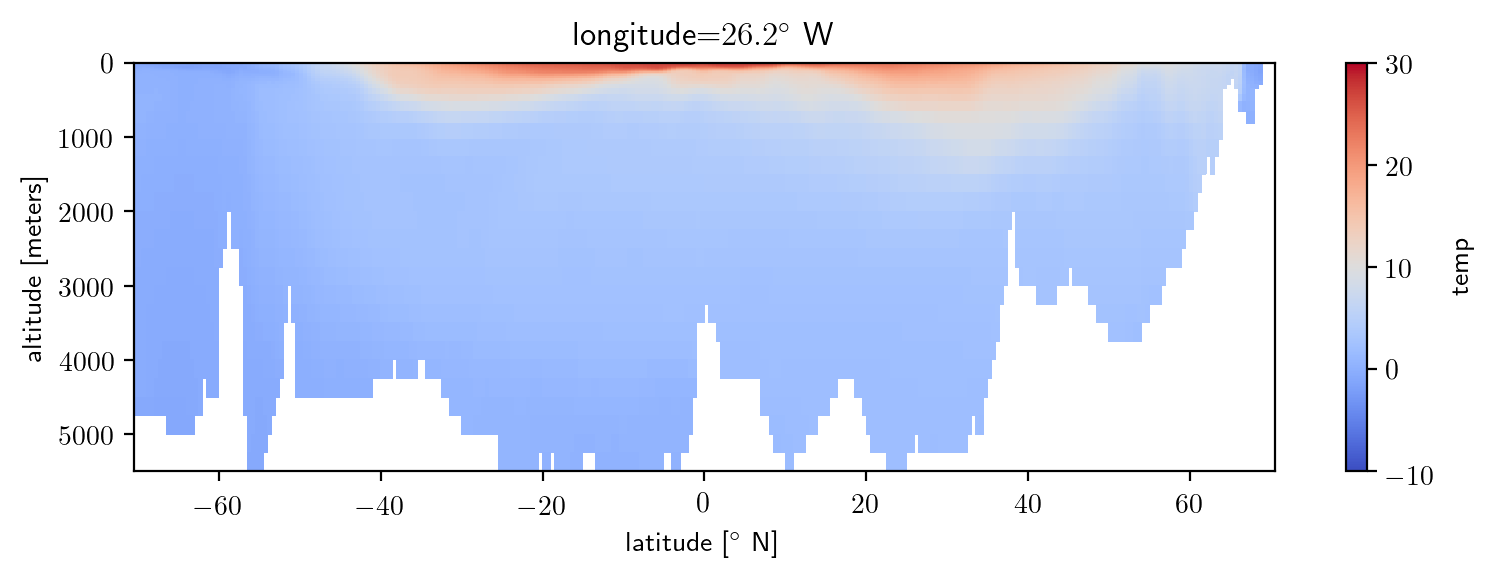

In [109]:
plot(temp_mean, "temp", "coolwarm", -10, 30)